In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pymongo
from wordcloud import WordCloud, STOPWORDS

In [75]:

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["contelligenz"]
mycol = mydb["movies"]
scorecastcol = mydb['popscastcores']
scorecrewcol = mydb['popscrewcores']

In [17]:
def top_n_movs(n=10):
    movs = mycol.find().sort("popularity-score", pymongo.DESCENDING).limit(n)
    return movs

def top_n_cast(n=10):
    movs = scorecastcol.find().sort("score", pymongo.DESCENDING).limit(n)
    return movs

def top_n_crew(n=10):
    movs = scorecrewcol.find().sort("score", pymongo.DESCENDING).limit(n)
    return movs

def top_genre():
    f = mycol.find()
    genres = [i['genre'].split(',') for i in f]

    genres = [item for sublist in genres for item in sublist]
    return genres

In [91]:
movies = [i for i in top_n_movs(10)]

## top n

In [99]:
titles = []
scores = []
genres = []
senti = []
for i in movies:
    # print(i['title'])
    titles.append(i['title'])
    genres.append(i['genre'])
    senti.append(i['sentiment-score'])
    scores.append(i['popularity-score'])

#### top titles 
(based on popularity score)

<AxesSubplot:>

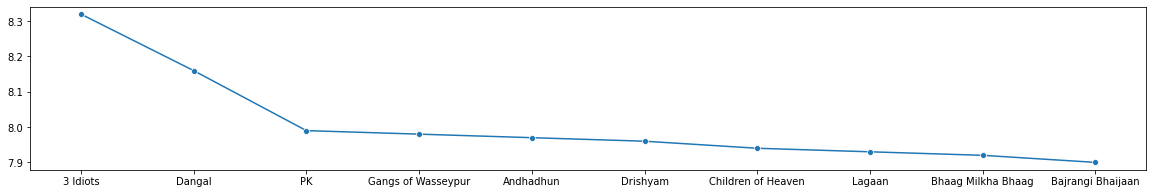

In [155]:
plt.figure(figsize=(20,3))
sns.lineplot(x=titles,y=scores, marker="o")


#### top genres
(based on count)

In [18]:

genres = top_genre()

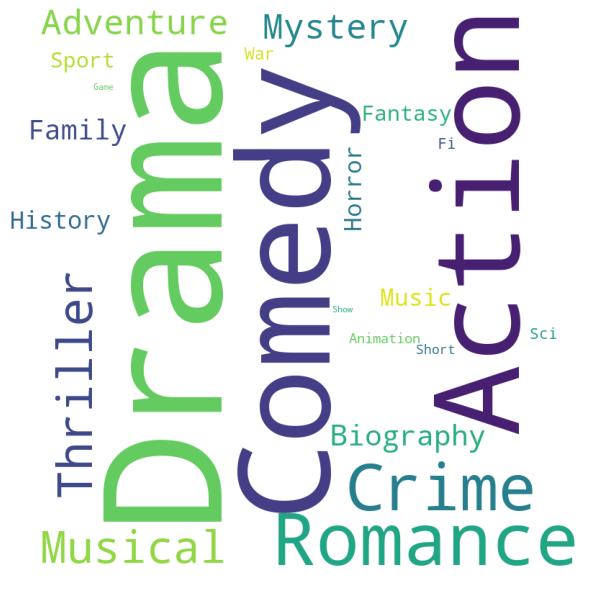

In [15]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False).generate(' '.join(genres))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Top actors
(use actor's popularity score)

In [19]:
h = [i for i in top_n_cast(10)]

In [20]:
names = [i['name'] for i in h]
scores = [i['score'] for i in h]

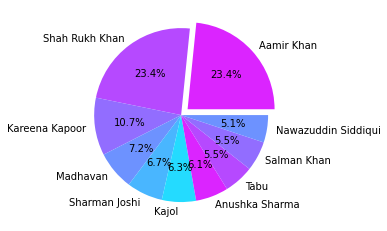

In [21]:
# from collections import Counter
# ls = [i.split(' ') for i in genres]
# flat_list = [item for sublist in ls for item in sublist]
palette_color = sns.color_palette('cool_r')
# data  = Counter(flat_list)
explode = [0.1 if i==0 else 0 for i in range(len(names))]
plt.pie(scores, labels=names, colors=palette_color,explode=explode,autopct='%.1f%%')
plt.show()

## one movie analysis

#### get movie

In [86]:
mov = mycol.find_one({'title':'Raazi'})

#### cast popularity

In [92]:
scores = []
names = []
for i in mov['cast']:
    try:
        score = scorecastcol.find_one({'name':i}).get("score")
        scores.append(score)
        names.append(i)
    except Exception as e:
        continue

/Users/atufashireen/projects/Tamu_Bloomberg/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


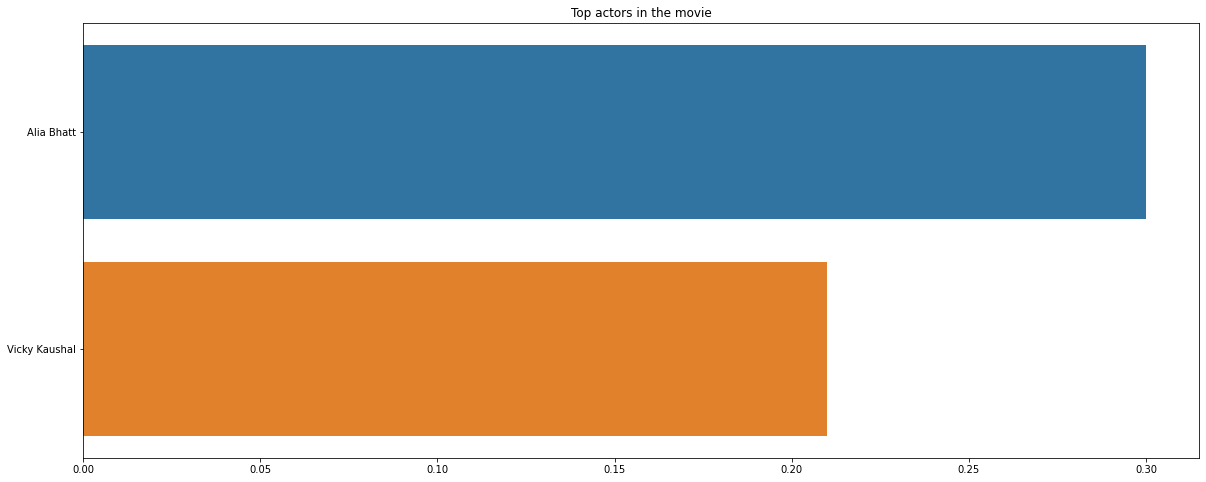

In [93]:
plt.figure(figsize=(20,8))
plt.title("Top actors in the movie")
sns.barplot(scores,names)
plt.show()

#### sentiment analysis

In [97]:
mov['sentiment-score']

{'positive': 23, 'negative': 2, 'neutral': 0, 'score': 0.7967115384615384}

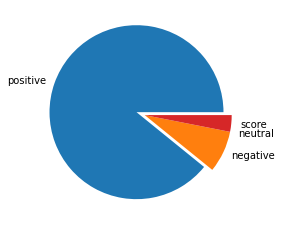

In [98]:
plt.pie(x = mov['sentiment-score'].values(),labels=mov['sentiment-score'].keys(),explode=[0.1,0,0,0])
plt.show()

#### review keywords

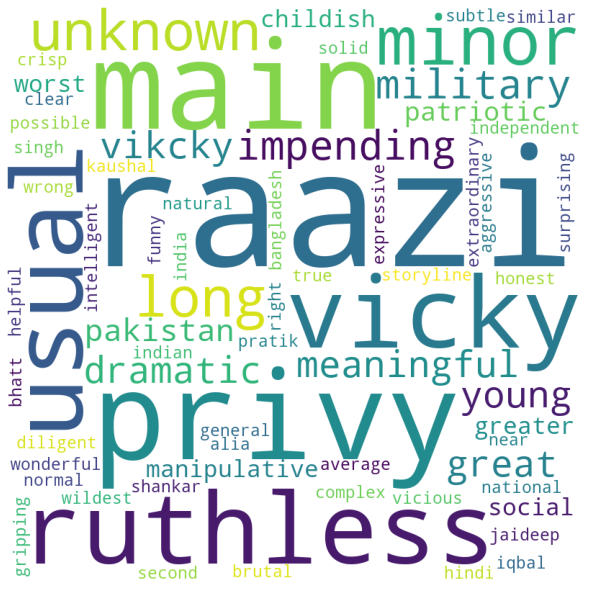

In [108]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(mov['review-keyword'][:70]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### summary keywords

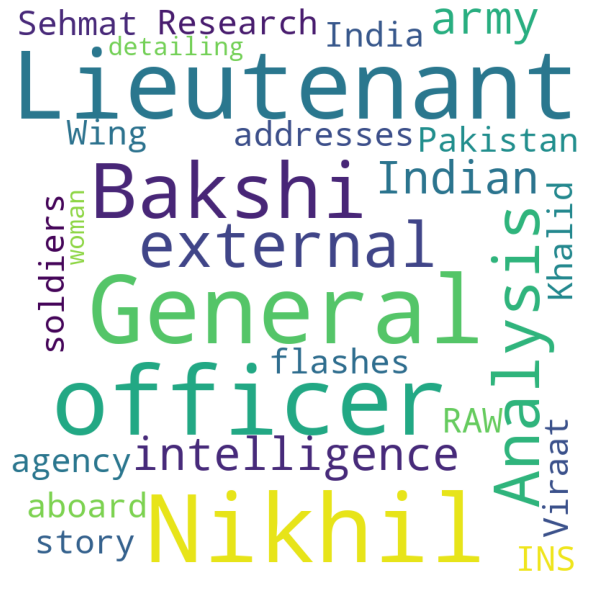

In [109]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(mov['plot-keyword']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()